# Random Forest classification with sklearn
Usage of Random Forest classification ML method. It will obtain the train/test score for a range of estimators.

It uses the ASTER satellite imaginery data of forested area in Japan, mapped with different forest types based on their spectral characteristics at visible-to-near infrared wavelengths: https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping

In [9]:
#import libraries for ML and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1.Import Japanese Forest Dataset


In [10]:
# importing the Forest Dataset
df = pd.read_csv('../forest_dataset.csv') #Dataframe for training.csv

#Extract the training targets
y_df = df[['class']]
y=y_df.values
y=y.reshape(-1)
print(type(y),"y:",y.shape)
#print(y)

#Extract the training data
df.drop(['class'],1,inplace=True)
X = df.values

print(type(X),"X:",X.shape)
#print(X)

<class 'numpy.ndarray'> y: (523,)
<class 'numpy.ndarray'> X: (523, 27)


In [11]:
#Split Dataset into Trainset and Testset 
#80 % for training and 20% for testting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Obtain train/test  accuracy
Obtain the accuracy of the train/test datasets, using a range (1,100) of estimators.


In [12]:
rf = RandomForestClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))

Training set score: 0.990
Test set score: 0.876


Max Training accuracy: 1.0 C= 17
Max test accuracy: 0.9142857142857143 C= 80


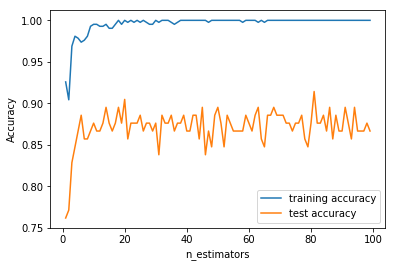

In [13]:
#Initialize the lists
training_accuracy = []
test_accuracy = []
%matplotlib inline
estimators_range = range(1, 100)
for n_estimators in estimators_range:
    # builds a classification model
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)
    #  write the "training set accuracy"
    training_accuracy.append(rf.score(X_train, y_train))
    # write the  "generalization accuracy"
    test_accuracy.append(rf.score(X_test, y_test))
plt.plot(estimators_range, training_accuracy, label="training accuracy")
plt.plot(estimators_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()
print("Max Training accuracy:",max(training_accuracy),"C=",training_accuracy.index(max(training_accuracy)))
print("Max test accuracy:",max(test_accuracy),"C=",test_accuracy.index(max(test_accuracy)))

## 3. Create plotting function for Cross-validation & Training Score

In [14]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 4. Obtain Cross-validation & Training Score 
Obtaining cross-validation with original dataset, using the value of C=test_accuracy.index(max(test_accuracy)) && C=training_accuracy.index(max(training_accuracy))

C= 17
C= 80


<module 'matplotlib.pyplot' from 'C:\\Users\\gollo\\Miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

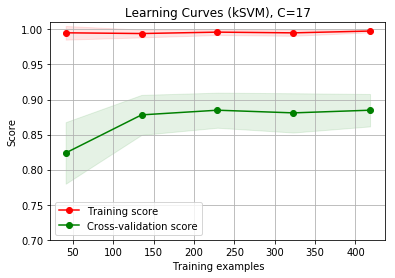

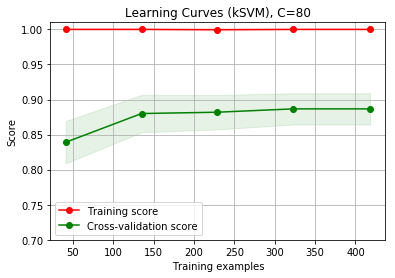

In [15]:
title = "Learning Curves (kSVM), C=" + str(training_accuracy.index(max(training_accuracy)))
# SVC is more expensive so we do a lower number of CV iterations:
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
print("C=",training_accuracy.index(max(training_accuracy)))
estimator =  RandomForestClassifier(n_estimators=training_accuracy.index(max(training_accuracy)))
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (kSVM), C=" + str(test_accuracy.index(max(test_accuracy)))
# SVC is more expensive so we do a lower number of CV iterations:
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
print("C=",test_accuracy.index(max(test_accuracy)))
estimator =  RandomForestClassifier(n_estimators=test_accuracy.index(max(test_accuracy)))
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

For more information about kNN classification, visit the following webpage: http://scikit-learn.org/stable/modules/ensemble.html#forest